In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Exercise H6.1: Convolutional neural network

In [3]:
## Data Preparation
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## (a) Linear Model

In [6]:
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y_estimate = tf.nn.softmax(tf.matmul(x, W) + b)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_estimate), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_pred = tf.equal(tf.argmax(y_estimate, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
tf.global_variables_initializer().run()

LM_train_acc = []
LM_test_acc = []
for i in range(10000):
    x_batch, y_batch = mnist.train.next_batch(100)
    train_step.run({x: x_batch, y: y_batch})
    if i % 50 == 0:
        tmp_train_acc = accuracy.eval({x:x_batch, y: y_batch})
        tmp_test_acc = accuracy.eval({x: mnist.test.images, y: mnist.test.labels})
        LM_train_acc.append(tmp_train_acc)
        LM_test_acc.append(tmp_test_acc)
        if i % 1000 == 0:
            print ("Step %d, train accuracy: %g, test acc: %g" % (i, tmp_train_acc, tmp_test_acc))

print("final accuracy: %g" % (accuracy.eval({x: mnist.test.images, y: mnist.test.labels})))

print ("finshed.")

Step 0, train accuracy: 0.46, test acc: 0.3187
Step 1000, train accuracy: 0.91, test acc: 0.9188
Step 2000, train accuracy: 0.97, test acc: 0.918
Step 3000, train accuracy: 0.94, test acc: 0.9222
Step 4000, train accuracy: 0.94, test acc: 0.9193
Step 5000, train accuracy: 0.95, test acc: 0.9251
Step 6000, train accuracy: 0.94, test acc: 0.9257
Step 7000, train accuracy: 0.91, test acc: 0.9241
Step 8000, train accuracy: 0.95, test acc: 0.925
Step 9000, train accuracy: 0.93, test acc: 0.9249
final accuracy: 0.9207
finshed.


## (b) MLP

In [10]:
def weight_init(shape):
    initial = tf.truncated_normal(shape, mean=0, stddev=0.01)
    return tf.Variable(initial)

def bias_init(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


def MLP(dropout):
    def calc_test_acc():
        correct_pred = tf.equal(tf.argmax(y_estimate, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
        return accuracy.eval({x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0})
    def calc_train_acc(x_batch, y_batch):
        correct_pred = tf.equal(tf.argmax(y_estimate, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
        return accuracy.eval({x: x_batch, y: y_batch, keep_prob: 1.0})
    in_units = 784
    h1_units = 1500
    h2_units = 1500
    h3_units = 1500
    out_units = 10
    
    sess = tf.InteractiveSession()
    
    W1 = weight_init([in_units, h1_units])
    b1 = bias_init([h1_units])
    
    W2 = weight_init([h1_units, h2_units])
    b2 = bias_init([h2_units])
    
    W3 = weight_init([h2_units, h3_units])
    b3 = bias_init([h3_units])
    
    W4 = weight_init([h1_units, out_units])
    b4 = bias_init([out_units])

    x = tf.placeholder(tf.float32, [None, in_units])
    y = tf.placeholder(tf.float32, [None, 10])
    keep_prob = tf.placeholder(tf.float32)
    
    hidden1 = tf.nn.relu(tf.matmul(x, W1) + b1)
    hidden1_drop = tf.nn.dropout(hidden1, keep_prob)
    
    hidden2 = tf.nn.relu(tf.matmul(hidden1_drop, W2) + b2)
    hidden2_drop = tf.nn.dropout(hidden2, keep_prob)
    
    hidden3 = tf.nn.relu(tf.matmul(hidden2_drop, W3) + b3)
    hidden3_drop = tf.nn.dropout(hidden3, keep_prob)
    
    y_estimate = tf.nn.softmax(tf.matmul(hidden3_drop, W4) + b4)
    
#     cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_estimate), 1))
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_estimate))
    train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cross_entropy)
    
    tf.global_variables_initializer().run()
    acc_train = []
    acc_test = []
    for i in range(20000):
        x_batch, y_batch = mnist.train.next_batch(100)
        train_step.run({x: x_batch, y: y_batch, keep_prob: dropout})
        if i % 100 == 0:
            tmp_acc_train = calc_train_acc(x_batch, y_batch)
            tmp_acc_test = calc_test_acc()
            acc_train.append(tmp_acc_train)
            acc_test.append(tmp_acc_test)
            if i % 1000 == 0:
                print ("Step %d, train accuracy: %g, test acc: %g" % (i, tmp_acc_train, tmp_acc_test))
        
    
    print("final test accuracy: %g" % (calc_test_acc()))

    print ("finshed.")
    return acc_train, acc_test
    
MLP_acc_train, MLP_acc_test = MLP(1.0)

Step 0, train accuracy: 0.47, test acc: 0.3148
Step 1000, train accuracy: 0.95, test acc: 0.9496
Step 2000, train accuracy: 0.95, test acc: 0.9629
Step 3000, train accuracy: 0.99, test acc: 0.9683
Step 4000, train accuracy: 0.99, test acc: 0.9756
Step 5000, train accuracy: 1, test acc: 0.9768
Step 6000, train accuracy: 1, test acc: 0.9764
Step 7000, train accuracy: 1, test acc: 0.9765
Step 8000, train accuracy: 0.97, test acc: 0.9785
Step 9000, train accuracy: 1, test acc: 0.9782
Step 10000, train accuracy: 0.99, test acc: 0.9798
Step 11000, train accuracy: 0.99, test acc: 0.9801
Step 12000, train accuracy: 1, test acc: 0.9807
Step 13000, train accuracy: 1, test acc: 0.9797
Step 14000, train accuracy: 1, test acc: 0.9808
Step 15000, train accuracy: 1, test acc: 0.9807
Step 16000, train accuracy: 0.99, test acc: 0.9792
Step 17000, train accuracy: 1, test acc: 0.9803
Step 18000, train accuracy: 0.99, test acc: 0.9795
Step 19000, train accuracy: 0.99, test acc: 0.9769
final test accuracy:

## (c) MLP with dropout

In [13]:
MLP_dropout_train_acc, MLP_dropout_test_acc = MLP(0.5)

Step 0, train accuracy: 0.35, test acc: 0.1977
Step 1000, train accuracy: 0.96, test acc: 0.9468
Step 2000, train accuracy: 0.94, test acc: 0.9624
Step 3000, train accuracy: 0.94, test acc: 0.9683
Step 4000, train accuracy: 0.98, test acc: 0.973
Step 5000, train accuracy: 1, test acc: 0.9739
Step 6000, train accuracy: 0.99, test acc: 0.9768
Step 7000, train accuracy: 0.98, test acc: 0.9762
Step 8000, train accuracy: 0.99, test acc: 0.9781
Step 9000, train accuracy: 1, test acc: 0.9796
Step 10000, train accuracy: 0.97, test acc: 0.9792
Step 11000, train accuracy: 0.99, test acc: 0.9788
Step 12000, train accuracy: 0.98, test acc: 0.9798
Step 13000, train accuracy: 0.99, test acc: 0.9804
Step 14000, train accuracy: 1, test acc: 0.9808
Step 15000, train accuracy: 1, test acc: 0.9793
Step 16000, train accuracy: 0.99, test acc: 0.9818
Step 17000, train accuracy: 0.97, test acc: 0.9802
Step 18000, train accuracy: 0.99, test acc: 0.9826
Step 19000, train accuracy: 1, test acc: 0.9817
final tes

## (d) CNN

In [18]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')


def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])
x_image = tf.reshape(x, [-1, 28, 28, 1])

W_conv1 = weight_init([5,5,1,32])
b_conv1 = bias_init([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_init([5,5,32,64])
b_conv2 = bias_init([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_init([7 * 7 *64, 1024])
b_fc1 = bias_init([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_init([1024, 10])
b_fc2 = bias_init([10])
y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer().minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

CNNs_train_acc = []
CNNs_test_acc = []
tf.global_variables_initializer().run()
for i in range(20000):
    batch = mnist.train.next_batch(100)
    if i % 100 == 0:
        tmp_train_acc = accuracy.eval(feed_dict = {x:batch[0], y_:batch[1], keep_prob: 1.0})
        tmp_test_acc = accuracy.eval(feed_dict={x:mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})
        CNNs_train_acc.append(tmp_train_acc)
        CNNs_test_acc.append(tmp_test_acc)
        if i % 1000 == 0:
            print("step %d, train accuracy %g, test acc: %g" % (i, tmp_train_acc, tmp_test_acc))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g" % accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob:1.0}))



step 0, train accuracy 0.11, test acc: 0.098
step 1000, train accuracy 0.97, test acc: 0.9738
step 2000, train accuracy 0.98, test acc: 0.9852
step 3000, train accuracy 1, test acc: 0.9852
step 4000, train accuracy 0.98, test acc: 0.9865
step 5000, train accuracy 0.99, test acc: 0.9885
step 6000, train accuracy 0.97, test acc: 0.9846
step 7000, train accuracy 0.97, test acc: 0.9873
step 8000, train accuracy 1, test acc: 0.9901
step 9000, train accuracy 1, test acc: 0.9899
step 10000, train accuracy 0.99, test acc: 0.9875
step 11000, train accuracy 0.98, test acc: 0.9894
step 12000, train accuracy 0.99, test acc: 0.9869
step 13000, train accuracy 0.99, test acc: 0.99
step 14000, train accuracy 1, test acc: 0.9907
step 15000, train accuracy 1, test acc: 0.9889
step 16000, train accuracy 0.99, test acc: 0.9906
step 17000, train accuracy 0.99, test acc: 0.9914
step 18000, train accuracy 0.99, test acc: 0.9899
step 19000, train accuracy 0.99, test acc: 0.991
test accuracy 0.99


## (e) Comparison

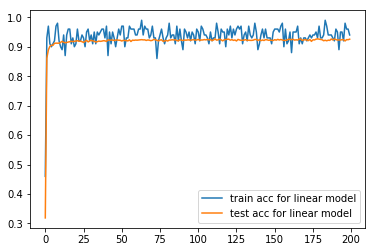

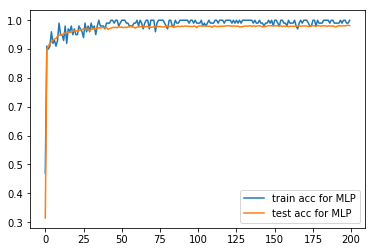

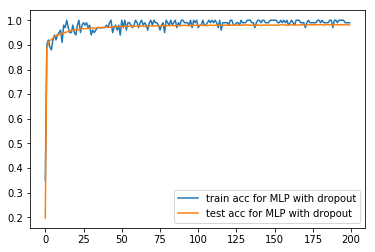

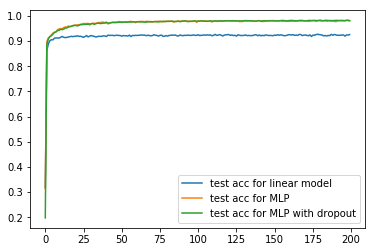

In [15]:
plt.plot(range(200), LM_train_acc, label = "train acc for linear model")
plt.plot(range(200), LM_test_acc, label = "test acc for linear model")
plt.legend()
plt.show()
plt.plot(range(200), MLP_acc_train, label = "train acc for MLP")
plt.plot(range(200), MLP_acc_test, label = "test acc for MLP")
plt.legend()
plt.show()
plt.plot(range(200),MLP_dropout_train_acc,  label = "train acc for MLP with dropout")
plt.plot(range(200),MLP_dropout_test_acc,  label = "test acc for MLP with dropout")
plt.legend()
plt.show()
# plt.plot(range(200), CNNs_train_acc,  label = "train acc for CNN")
# plt.plot(range(200), CNNs_test_acc,  label = "test acc for CNN")
# plt.legend()
# plt.show()

plt.plot(range(200), LM_test_acc, label = "test acc for linear model")
plt.plot(range(200), MLP_acc_test, label = "test acc for MLP")
plt.plot(range(200),MLP_dropout_test_acc,  label = "test acc for MLP with dropout")
# plt.plot(range(200), CNNs_test_acc,  label = "test acc for CNN")
plt.legend()
plt.show()

Sorry we don't have time to finish running CNN training procedure, that's why we don't have the plot for CNN. However, From the printed log we could see that CNN could get the excellent prediction accuracy in a fastest way compared to other 2 models.
From the result of both MLP and CNN, sometimes we could see overfitting on training set(acc = 1), but this doesn't influence test accuracy too much. Both regulation and convolutional layers could prevent overfitting. 
About the hyper parameters, we need to consider learning rate for all of those models. And for MLP, we also need to consider the size of hidden layers. For CNN, we need to consider the size of convolutional layer.

# Exercise H6.2: LSTM

In [ ]:
import numpy as np
from tensorflow.contrib import rnn

NUM_NEURONS_PER_LAYER = 200 #1500
STEPS = 60 #20000
EPSILON = 1e-4 #1e-8

def generateData(size):
    x = np.random.randint(0, 10, (size, 30, 1))
    y = np.array([np.where(np.sum(x, axis=1) >= 135, 1, 0)])
    print(y.shape)
    print(np.sum(y))
    return x,y
x_train, y_train = generateData(8000)

x_test, y_test = generateData(2000)
print(y_test)

x = tf.placeholder(tf.float32, [None, 30, 1])
y_ = tf.placeholder(tf.float32, [None, 1])

x_unstacked = tf.unstack(x, 30, 1)

lstm_cell = rnn.BasicLSTMCell(NUM_NEURONS_PER_LAYER, forget_bias=1.0)
outputs, states = rnn.static_rnn(lstm_cell, x_unstacked, dtype=tf.float32)

W_out = weight_init([200, 1])
b_out = bias_init([1])

y = tf.matmul(outputs[-1], W_out) + b_out
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y, labels=y_)
train_step = tf.train.AdamOptimizer(EPSILON).minimize(cross_entropy)


p5 = tf.constant(0.5)
delta = tf.abs((y_ - y))

correct_prediction = tf.cast(tf.less(delta, p5), tf.int32)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init_op = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init_op)

for i in range(STEPS):
    b = np.random.choice(8000, 50)
    x_batch = np.take(x_train, b, axis=0)
    y_batch = np.take(y_train, b, axis=1)[0]
    if i % 10 == 0:
        acc = sess.run(accuracy, feed_dict = {x: x_test, y_: y_test[0]})
        print('step %d, test accuracy %g' % (i, acc))
        acc = sess.run(accuracy, feed_dict = {x: x_batch, y_: y_batch})
        print('         train accuracy %g' % (acc))
    sess.run(train_step,feed_dict={x: x_batch, y_: y_batch})

print('test accuracy %g' % sess.run(accuracy, feed_dict = {x: x_test, y_: y_test[0]}))
